# 均方误差MSE
Mean Squared Error
![mse](img/mse.png)

RMSE:
![rmse](img/rmse.png)


MAE:
![mae](img/mae.png)

# 衡量标准
## 波士顿房产数据

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# 我们只用一个RM (ROOM 属性)
x = boston.data[:, 5]
y = boston.target

In [6]:
x.shape

(506,)

In [7]:
y.shape

(506,)

Text(0,0.5,'house price')

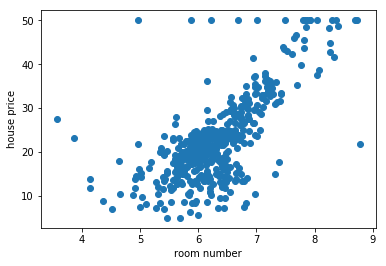

In [8]:
# 价格大于50的被定为50
plt.scatter(x, y)
plt.xlabel("room number")
plt.ylabel("house price")

In [9]:
np.max(y)

50.0

In [10]:
x = x[y<50]

In [11]:
y = y[y<50]

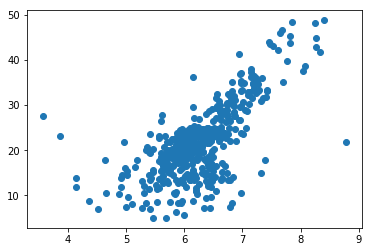

In [12]:
plt.scatter(x, y)

### 简单线性回归

In [13]:
from playML.model_selection import train_test_split

In [14]:
X_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [15]:
from playML.simpleLineRegression import SimpleLinearRegression2

In [16]:
reg = SimpleLinearRegression2()

In [17]:
reg.fit(X_train, y_train)

SimpleLinearRegression2

In [18]:
reg.a_

7.8608543562689555

In [19]:
reg.b_

-27.459342806705543

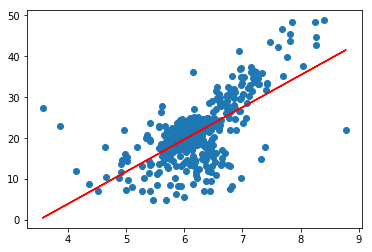

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), color="r")

In [21]:
y_predict = reg.predict(x_test)

### MSE

In [22]:
mse_test = np.sum((y_predict - y_test) ** 2)/ len(y_test)

In [23]:
mse_test

24.156602134387438

### RMSE

In [24]:
from math import sqrt

In [25]:
rmse_test = sqrt(mse_test)

In [26]:
rmse_test

4.914936635846635

### MAE

In [27]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)

In [28]:
mae_test

3.5430974409463873

In [29]:
from playML import metrics

In [30]:
metrics.mean_absolute_error(y_test, y_predict)

3.5430974409463873

# sklearn 中的error

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [32]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

# R square 一个更常用的错误评估函数
想想前面的分类问题, 得出的分数, 1 代表全部预测正确, 0 代表全部预测错误. 这个所有的范围都在这中间.
<br>
但是这里的mse mae却无法获取稳定的范围.
<br>
R sqaured error 可以将错误率映射在0-1 之间:
![r](img/r.png)
分子是使用我们模型预测的错误.
分母是使用y_mean 作为预测的错误(baseline model)

<br>
<br>
![rs](img/rsquared.png)

In [33]:
1 - mean_squared_error(y_test, y_predict)/np.var(y_test)

0.6129316803937322

In [34]:
from sklearn.metrics import r2_score

In [35]:
reg.score(x_test, y_test)

0.6129316803937322